In [3]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams["axes.formatter.use_mathtext"] = True

sns.set(font="cmr10")
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid", context="paper", font="Arial")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

def save_figure(name):
    plt.savefig(f"{name}.pdf", format="pdf", bbox_inches="tight")

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

In [54]:
data = pd.read_csv("./gloria-data.csv")
data.head()

,Participant id,Group,Submission id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,...,Webcam,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,60459f654004876e609870e9,BASELINE,645117fa0706aac97fb92ba0,APPROVED,2023-05-02T14:02:34Z,2023-05-02T14:10:59.306000Z,2023-05-02 21:44:53,2023-05-02T14:10:59.913134Z,506,CKUN41EW,...,Yes,45,Male,White,United Kingdom,Ireland,United Kingdom,English,DATA_EXPIRED,DATA_EXPIRED
1,6298e97db2a191f24ebb9db1,BASELINE,645118855c65f7ab3c4bbc5c,APPROVED,2023-05-02T14:07:26.461000Z,2023-05-02T14:25:16.934000Z,2023-05-02 21:44:53,2023-05-02T14:25:17.346591Z,1071,CKUN41EW,...,Yes,35,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,"Not in paid work (e.g. homemaker', 'retired or..."
2,637fefef5c620e2f66047f28,BASELINE,6451199874454aa2ce94590f,APPROVED,2023-05-02T14:09:28.422000Z,2023-05-02T14:50:02.147000Z,2023-05-02 21:44:53,2023-05-02T14:50:02.553125Z,2434,CKUN41EW,...,Yes,29,Male,White,Lithuania,United Kingdom,Lithuania,Russian,No,Part-Time
3,5ea9890b7baf810a13bcdb56,BASELINE,645119b45749b4ffbe3e2da3,APPROVED,2023-05-02T14:10:06.076000Z,2023-05-02T14:17:54.504000Z,2023-05-02 21:44:54,2023-05-02T14:17:54.952568Z,469,CKUN41EW,...,Yes,20,Female,Mixed,United Kingdom,United Kingdom,United Kingdom,English,Yes,Part-Time
4,62fce8f6702f3ef6c7cfb785,BASELINE,64511a2d7ad3ceaf8e8844ad,APPROVED,2023-05-02T14:12:01.229000Z,2023-05-02T14:18:04.726000Z,2023-05-02 21:44:54,2023-05-02T14:18:05.151882Z,364,CKUN41EW,...,Yes,24,Male,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time


In [55]:
group = "Group"
age = "Age"
sex = "Sex"
nat = "Nationality"

baseline = data[data[group]=="BASELINE"]

In [56]:
emoji_only = data[data[group]=="EMOJIONLY"]
emoji_only

,Participant id,Group,Submission id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,...,Webcam,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
60,634d98bd566df98eb0e95314,EMOJIONLY,6451a1c34271521dfd0f45b1,APPROVED,2023-05-02T23:50:38.632000Z,2023-05-03T00:00:39.806000Z,45049.04684,2023-05-03T00:04:51.082101Z,602,CKUN41EW,...,Yes,33,Male,Black,Nigeria,United Kingdom,Nigeria,English,Yes,Full-Time
61,5f4d822a5080c693e800932f,EMOJIONLY,6451a33f2d7724e388795b3e,APPROVED,2023-05-02T23:56:55.497000Z,2023-05-03T00:03:07.112000Z,45049.04684,2023-05-03T00:05:40.297099Z,372,CKUN41EW,...,Yes,52,Male,White,Australia,Australia,Australia,English,DATA_EXPIRED,DATA_EXPIRED
62,5db8a4f15f7e1a000a20d09c,EMOJIONLY,6451a55d3e1035f992d5e444,APPROVED,2023-05-03T00:05:54.496000Z,2023-05-03T00:14:18.576000Z,45049.04684,2023-05-03T00:14:19.131510Z,505,CKUN41EW,...,Yes,19,Male,Asian,United Kingdom,United Kingdom,United Kingdom,English,Yes,Unemployed (and job seeking)
63,57b28526f6b9390001af1edd,EMOJIONLY,6451a56af0788869ada5010e,APPROVED,2023-05-03T00:06:14.057000Z,2023-05-03T00:16:35.767000Z,45049.04684,2023-05-03T00:16:36.127956Z,622,CKUN41EW,...,Yes,41,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,DATA_EXPIRED
64,5e38fd401dcb4911f7c63b65,EMOJIONLY,6451a6f086720557685393af,APPROVED,2023-05-03T00:12:32.722000Z,2023-05-03T00:17:31.523000Z,45049.04684,2023-05-03T00:17:31.867012Z,299,CKUN41EW,...,Yes,39,Male,White,Australia,Australia,Australia,English,Yes,Full-Time
65,63ced18da9e0fa1f6bc14a67,EMOJIONLY,6451a72a4f4a9005e7268478,APPROVED,2023-05-03T00:13:46.922000Z,2023-05-03T00:24:52.151000Z,45049.04685,2023-05-03T00:24:52.490239Z,666,CKUN41EW,...,Yes,44,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
66,60149ad4dc001b4d6d233fbc,EMOJIONLY,6451a73cbce85a7c1cdc8119,APPROVED,2023-05-03T00:13:58.162000Z,2023-05-03T00:20:48.226000Z,45049.04685,2023-05-03T00:20:48.630474Z,411,CKUN41EW,...,Yes,21,Male,Mixed,Saudi Arabia,United Kingdom,Saudi Arabia,Arabic,Yes,Full-Time
67,6393eed7311659e36b95da3b,EMOJIONLY,6451a7a51bea7a3ae207859b,APPROVED,2023-05-03T00:15:33.518000Z,2023-05-03T00:25:43.849000Z,45049.04685,2023-05-03T00:25:46.654900Z,611,CKUN41EW,...,Yes,45,Female,White,Australia,Australia,Australia,English,Yes,"Not in paid work (e.g. homemaker', 'retired or..."
68,627e79a6e1f2b10601861ca6,EMOJIONLY,6451a7a5e9b8a4d0f2a50126,APPROVED,2023-05-03T00:15:37.914000Z,2023-05-03T00:22:50.374000Z,45049.04685,2023-05-03T00:22:50.734972Z,433,CKUN41EW,...,Yes,25,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,"Not in paid work (e.g. homemaker', 'retired or..."
69,61113ad836a1f1b60f4c9389,EMOJIONLY,6451a7d29a68bc8eaf7b07a4,APPROVED,2023-05-03T00:16:46.760000Z,2023-05-03T00:28:50.341000Z,45049.04685,2023-05-03T00:28:50.735403Z,724,CKUN41EW,...,Yes,69,Male,White,United Kingdom,United Kingdom,United Kingdom,English,DATA_EXPIRED,DATA_EXPIRED


In [57]:
emoji_and_chat = data[data[group]=="EMOJIANDCHAT"]
emoji_and_chat

,Participant id,Group,Submission id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,...,Webcam,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
119,5e68682ce3b2f71041fa03d2,EMOJIANDCHAT,6451b8d7ed2b9c95c4dc8126,APPROVED,2023-05-03T01:28:58.227000Z,2023-05-03T01:37:38.772000Z,2023-05-03 05:00:55,2023-05-03T01:37:39.121913Z,521,CKUN41EW,...,Yes,36,Male,Mixed,United States,United States,United States,Spanish,No,Full-Time
120,60f8658bf9d1627d3bc87a3d,EMOJIANDCHAT,6451bb9db3c7937503539358,APPROVED,2023-05-03T01:41:18.022000Z,2023-05-03T01:51:21.383000Z,2023-05-03 05:00:55,2023-05-03T01:51:21.809423Z,604,CKUN41EW,...,Yes,32,Female,White,United Kingdom,United Kingdom,United Kingdom,English,DATA_EXPIRED,DATA_EXPIRED
121,63bd81465a7246c0da98e4bd,EMOJIANDCHAT,6451bc5727f4ab9e69bd6fd4,APPROVED,2023-05-03T01:43:54.767000Z,2023-05-03T01:54:51.096000Z,2023-05-03 05:00:55,2023-05-03T01:54:51.538585Z,657,CKUN41EW,...,Yes,31,Male,White,United Kingdom,United Kingdom,United Kingdom,English,Yes,Unemployed (and job seeking)
122,5f7e235793c5e10cba3bbb4d,EMOJIANDCHAT,6451bc923d76691d4947f2a2,APPROVED,2023-05-03T01:44:57.794000Z,2023-05-03T01:56:42.013000Z,2023-05-03 05:00:55,2023-05-03T01:56:42.452915Z,705,CKUN41EW,...,Yes,59,Female,White,United States,United States,Italy,English,No,"Not in paid work (e.g. homemaker', 'retired or..."
123,608896a8c9f6f5277f45829b,EMOJIANDCHAT,6451bdb027f4ab9e69bd6fff,APPROVED,2023-05-03T01:49:49.347000Z,2023-05-03T01:57:57.115000Z,2023-05-03 05:00:56,2023-05-03T01:57:57.486192Z,488,CKUN41EW,...,Yes,36,Male,White,Australia,Australia,Australia,English,No,Full-Time
124,61459be797c9650ece9bcc0a,EMOJIANDCHAT,6451be10e68b82c0762f1d6a,APPROVED,2023-05-03T01:51:49.707000Z,2023-05-03T02:12:00.489000Z,2023-05-03 05:00:56,2023-05-03T02:12:00.867217Z,1211,CKUN41EW,...,Yes,62,Male,White,Australia,Australia,Australia,English,No,Other
125,6402c06e44bb107c5f3735f3,EMOJIANDCHAT,6451bee9904543745df6884d,APPROVED,2023-05-03T01:54:53.518000Z,2023-05-03T02:06:34.161000Z,2023-05-03 05:00:56,2023-05-03T02:06:34.525914Z,701,CKUN41EW,...,Yes,36,Female,White,United States,United States,United States,English,No,Unemployed (and job seeking)
126,60f8adb9a315f316c3aee425,EMOJIANDCHAT,6451bf0602e70836a87b07c8,APPROVED,2023-05-03T01:55:25.325000Z,2023-05-03T02:02:39.647000Z,2023-05-03 05:00:56,2023-05-03T02:02:40.024217Z,435,CKUN41EW,...,Yes,44,Female,Mixed,United States,United States,United States,English,No,Other
127,5aeab6e39e185a0001b9e272,EMOJIANDCHAT,6451bf685d81030d88864e35,APPROVED,2023-05-03T01:56:56.261000Z,2023-05-03T02:02:15.982000Z,2023-05-03 05:00:56,2023-05-03T02:02:16.379366Z,320,CKUN41EW,...,Yes,31,Female,White,United States,United States,United States,English,No,Part-Time
128,6096ee4ed5f41e6e17598ec9,EMOJIANDCHAT,6451bf79e603253d89795b52,APPROVED,2023-05-03T01:57:13.355000Z,2023-05-03T02:12:05.315000Z,2023-05-03 05:00:56,2023-05-03T02:12:05.775922Z,892,CKUN41EW,...,Yes,40,Male,Other,United States,United States,Mexico,English,No,Part-Time


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

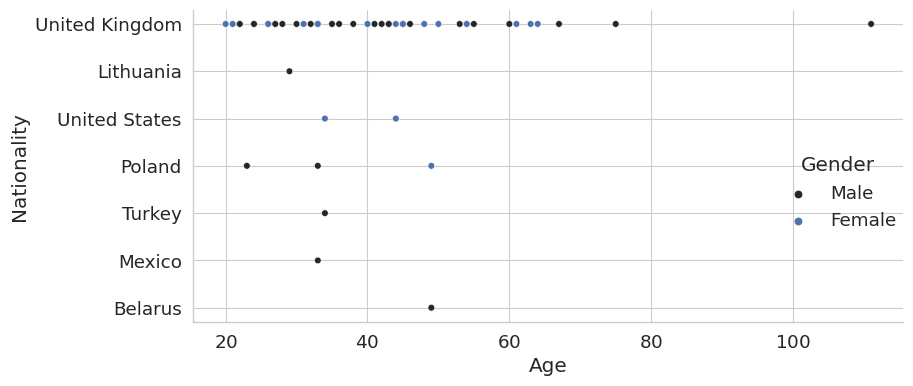

In [58]:
plot = sns.relplot(
    baseline,
    x=age,
    y=nat,
    hue=sex,
    palette="dark:b"
)

plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plot.figure.set_size_inches(10, 3.5)
plot.legend.set_title("Gender")
plot.set_xlabels("Age")
plot.set_ylabels(None)
save_figure("baseline_demo")

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

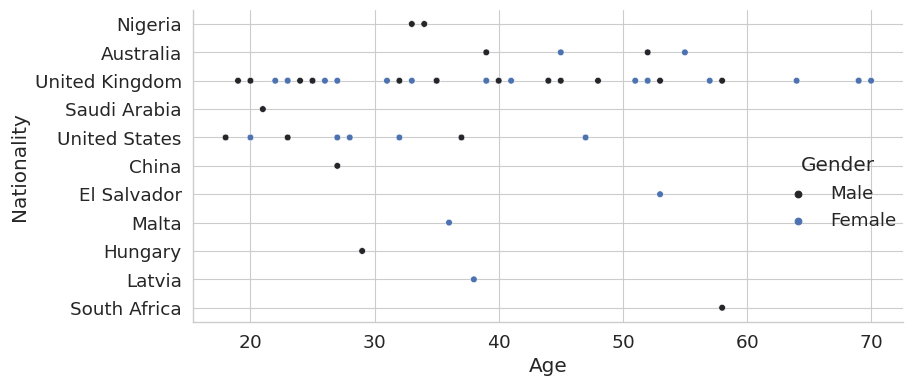

In [59]:
plot = sns.relplot(
    emoji_only,
    x=age,
    y=nat,
    hue=sex,
    palette="dark:b"
)

plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plot.figure.set_size_inches(10, 3.5)
plot.legend.set_title("Gender")
plot.set_xlabels("Age")
plot.set_ylabels(None)
save_figure("emoji_only_demo")

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

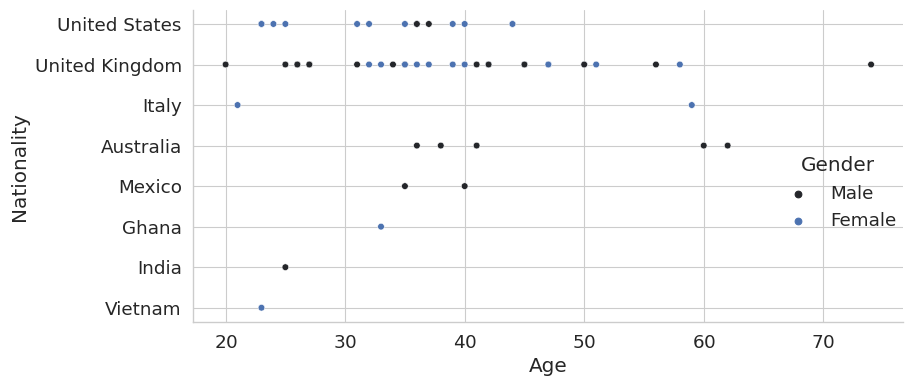

In [60]:
plot = sns.relplot(
    emoji_and_chat,
    x=age,
    y=nat,
    hue=sex,
    palette="dark:b"
)

plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plot.figure.set_size_inches(10, 3.5)
plot.legend.set_title("Gender")
plot.set_xlabels("Age")
plot.set_ylabels(None)
save_figure("emoji_and_chat_demo")

In [1]:
text = """
The bot is there to help with a certain problem that is it. 
I feel like I would not be able to discuss serious emotional issues with the bot because I would feel manipulated. 
I would be less inclined to discuss emotional topics.
If i was in pain t the time it could pick up on that.
I don't think it would change what I would say. Knowing no matter what everything said is logged somehow,  There are no secrets.
it would be helpful if it could detect them correctly, could tell if someone was happy or sad etc
I'm not fan of being recorded but other than that I don't see this bot and it's action as any problem/issue
I suppose I could feel self conscious but less so than with a human 
it wouldnt
it would be helpful
It would make the bot more responsive to emotional topics, if it saw me cry it might ask if im okay
They need to be able to answer to your specific questions which tends not to happen regardless of whether they can detect your emotions or not
yes i just spoke about drugs with the bot i was not worried
Cannot think of any.
At the end of the day it's just a robot, it will never feel like talking to a real human being that can understand you.
I think it would encourage me to open up more maybe about more serious things like depression
It wouldn't. I would still feel that I can talk to it about a lot of things if I felt lonely.
It would not as it is just a computer program
it would help especially in helping someone with a mental illness
I think it was of an extremely sensitive subject i wouldn't feel comfortable having my camera on 
It would definitely feel more personal and I would worry about discussing more embarrassing things. 
I may be happier to go into more detail if they are acknowledging my emotions.
I don't think that it would affect the topics I would be willing to discuss with it.
I would probably ignore its ability to monitor my emotions. I have to concentrate hard on the keyboard when typing.
I think I would be less willing to have discussions of deeper meaning as I feel like these discussions are more suited to human-human interaction where there is an emotional response from both sides.
Assuming that I am able to access a model that is open-source and runs locally, I would be willing to discuss any topic with a system that has facial expression detection capabilities. My willingness to do it is mostly motivated by curiosity - I would be interested to experiment with it and see how well it works and how useful it could be. 
"
yes, it would make difficult conversations easier"
I would probably open up less in case they were judgemental
It would probably make me more honest
It could be empathetic in its responses to you, giving the conversation a much more humane feeling. It may also choose its words very carefully so as not to cause offense to your perceived emotional state.
Not much change in what i want to discuss
i'd perhaps be more secretive and keep personal emotions to myself.
Makes it feel more natural overall
Personal issues and concerns might be interesting for emotional support and advice.
more open as you are less likely to be able to hide anything `
Yes, I would want to be more secretive with the bot.
I don't think this would change my willingness about what to discuss, either way.
I would be more open as I would feel it "got" me and understood more as it would be more responsive.
It was not affected at all. I think it could be useful because it is more similar to when real people is talking in person.
I would be more likely to discuss slightly more sensitive topics with the bot such as my relationships or my future plans
I would feel strange talking about more personal topics (related to intimacy, for example) if I knew the bot were looking at my face and reading my expressions.
i may be more reserved
I would discuss any topics anyway
I think that emotion detection is positive for suggestive topics or responses overall
Not at all in any way.
I'm not sure it would make a difference
I wouldn't chat on sensitive topics with it
I think I would be more open to share things.
It doesn't it is a nice data source but that is it.
in some situations if it was a really personal or sensitive topic it might make me feel a bit vulnerable
I could steer the conversation away from the perceived notion of me being in pain.
i think i'd be fairly happy to use such a feature, it would be more like having an actual conversation and i could afterall control when i had the chat
I would be more comfortable taking about a wider range of subjects as the chatbot would be more able to put me at east it it could detect my emotions
When a chatbot  detects emotions, it might adjust its responses and recommendations accordingly. If I express stress, it can offer resources for relaxation or coping strategies.
I would feel more open and friendly knowing that the chatbot is trying to be human-like.
I would be happy to discuss all topics especially more difficult emotional topics 
I might ask it for more personal advice if I feel it can detect and respond to my emotions
I would love to talk to AI about any topic. I would love to be melded with AI as one entity and be able to transfer my soul to a robotic body and live forever and interact with AI 
I woudn't like to discuss anything with the bot if I was really upset about something.
I bellieve it could make me feel more comfortable or even calm me down if it was a situation where I was really upset
"""

In [10]:
from wordcloud import STOPWORDS, WordCloud

stopwords = set(STOPWORDS)
stopwords.add("bot")
stopwords.add("make")
stopwords.add("topic")
stopwords.add("think")

cloud = WordCloud(background_color="white", stopwords=stopwords).generate(text)

plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")

TypeError: WordCloud.__init__() got an unexpected keyword argument 'format'